# PRIMER PARCIAL

In [103]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# 1. PARTE 1

In [105]:
#Redireccionar nuestra localización a donde està el archivo de irir
path = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

In [106]:
df = pd.read_csv(path)
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [107]:
import seaborn as sns

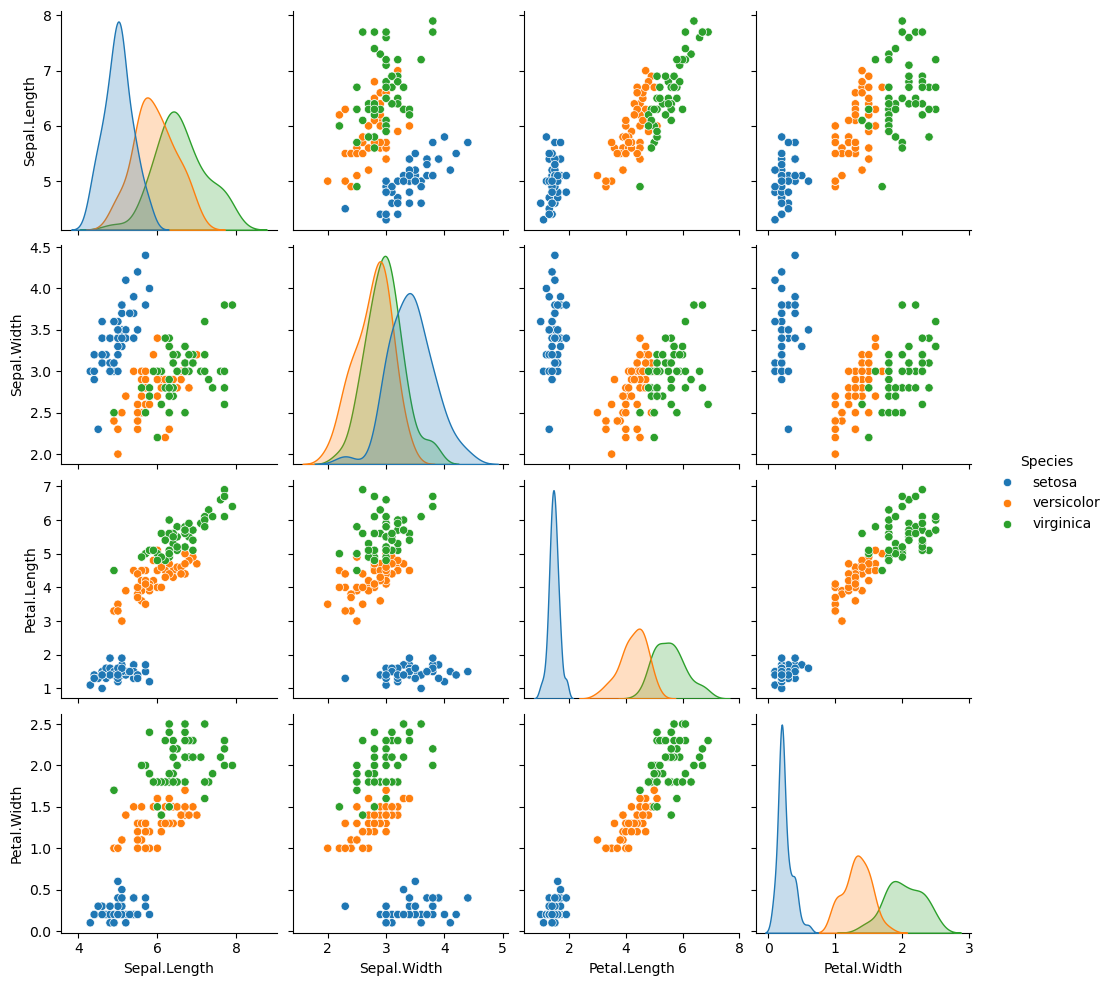

In [108]:
X = df.iloc[:, :4] #filtrar solo las 4 columnas numericas
sns.pairplot(df, hue="Species") #mostrar la correlacion entre las cuatro variables pero solo de 2 en 2, agregando hue agregamos color a
#cada grupo de datos, ya que al especificar que sea por especies le estamos diciendo que no son un solo conjunto sino que todos los
# que correspondan a la cantidad de grupos en Species

In [109]:
X

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [110]:
#Calcular los vectores y valores propios a partir de la matriz de covarianza (la diferencia entre la de 
#correlación es que no es estrictamente necesario que tengan la misma dimensión).
#Porcentaje de aporte de las variables y cuyantas ocupamos para representar el 85% de datos.

In [111]:
df['Species'].unique() #nos dice cuales elementos definen Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [112]:
#Primero Normalizamos los datos de nuestros array
np.mean(X, axis=0), np.std(X, axis=0)

(Sepal.Length    5.843333
 Sepal.Width     3.057333
 Petal.Length    3.758000
 Petal.Width     1.199333
 dtype: float64,
 Sepal.Length    0.825301
 Sepal.Width     0.434411
 Petal.Length    1.759404
 Petal.Width     0.759693
 dtype: float64)

In [113]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X_std

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]

In [114]:
X_std.iloc[:, 0] #Index location siempre que trabajemos con un dataframe, o sea agarrate todos los indices 

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: Sepal.Length, Length: 150, dtype: float64

In [115]:
X_std.describe() #Para corroborar la normalización

Sepal.Length   Sepal.Width  Petal.Length   Petal.Width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -8.052818e-16 -2.842171e-16 -4.736952e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.433947e+00 -1.567576e+00 -1.447076e+00
25%   -9.006812e-01 -5.923730e-01 -1.226552e+00 -1.183812e+00
50%   -5.250608e-02 -1.319795e-01  3.364776e-01  1.325097e-01
75%    6.745011e-01  5.586108e-01  7.627583e-01  7.906707e-01
max    2.492019e+00  3.090775e+00  1.785832e+00  1.712096e+00

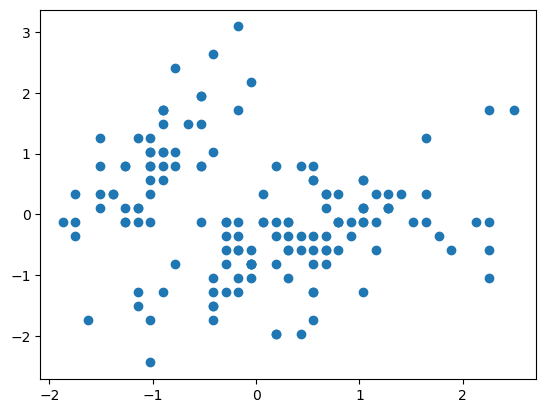

In [116]:
plt.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1])

# Calculo de la Matriz covarianza

In [118]:
X_mean = np.mean(X_std, axis=0)
X_mean

Sepal.Length   -4.736952e-16
Sepal.Width    -8.052818e-16
Petal.Length   -2.842171e-16
Petal.Width    -4.736952e-16
dtype: float64

In [119]:
cov_matrix = (X_std - X_mean).T.dot((X_std - X_mean))/(X_std.shape[0]-1) #primer metodo para sacar matriz cov
cov_matrix

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.006711    -0.118359      0.877604     0.823431
Sepal.Width      -0.118359     1.006711     -0.431316    -0.368583
Petal.Length      0.877604    -0.431316      1.006711     0.969328
Petal.Width       0.823431    -0.368583      0.969328     1.006711

In [120]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

# Calculo de valores y vectores propios con la matriz de covarianza

In [122]:
#Manera corta de calcularlos (la del rpofe)
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [123]:
eig_vals, eig_vectors = np.linalg.eig(np.cov(X_std.T))
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [124]:
#Manera rápida del profe para sacar el % de cada vector
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449483,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462436,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [125]:
# Ordenamos de mayor a menor
eigen_pairs.sort(reverse=True)

# Calculamos los porcentajes
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [126]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842]

In [127]:
print('El porcentaje de información acumulado es:')
cum_var_exp

El porcentaje de información acumulado es:


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [128]:
#Sacar el porcentaje de cada uno de los vectores 
total_sum = np.sum(eig_vals)

val_porc_eig_val_1 = eig_vals[0]/total_sum * 100 #Los corchetes indican que estamos trabajando ahuevo con arreglos, el 0 es la posición 
val_porc_eig_val_2 = eig_vals[1]/total_sum * 100 #1 del array, nuestro array en este caso es eig_vals y [0] le estamos diciendo
val_porc_eig_val_3 = eig_vals[2]/total_sum * 100 #que tome el primer dato de ese array, y así susesivamente
val_porc_eig_val_4 = eig_vals[3]/total_sum * 100
val_porc_eig_val_1, val_porc_eig_val_2, val_porc_eig_val_3, val_porc_eig_val_4
#En este caso podemos ver que sólo los 2 primeros datos del array (valor propio 1 y 2) expresan el 94% de nuestros datos.


(72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842)

In [129]:
#Metodo rápido del profe, lo hago para ver que me diera lo mismo
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [130]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842]

# Creando la matriz que representa la Tlineal

In [132]:
#Al transformar estamos proyectando en un espacio reducido, por lo que perse ya no estamos trabajando con los mismos datos
# o sea nos da los datos tomando en consideración 3 datos en este caso. Cuando reducimos de dimensión tendremos la información organizada. 
#Es ver la proyección con las sombras.

In [133]:
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449483,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462436,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [134]:
eigen_pairs[0][1], eigen_pairs[1][1]

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))

In [135]:
T_matrix = np.stack((eigen_pairs[0][1], eigen_pairs[1][1]), axis=1)
T_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [136]:
T_matrix.shape

(4, 2)

In [137]:
# Aquí calculamos los vectores proyectados sin usar for
Y = X_std.dot(T_matrix)
Y

0         1
0   -2.264703 -0.480027
1   -2.080961  0.674134
2   -2.364229  0.341908
3   -2.299384  0.597395
4   -2.389842 -0.646835
..        ...       ...
145  1.870503 -0.386966
146  1.564580  0.896687
147  1.521170 -0.269069
148  1.372788 -1.011254
149  0.960656  0.024332

[150 rows x 2 columns]

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=2)
data_proyectada = pca.fit_transform(X_std)

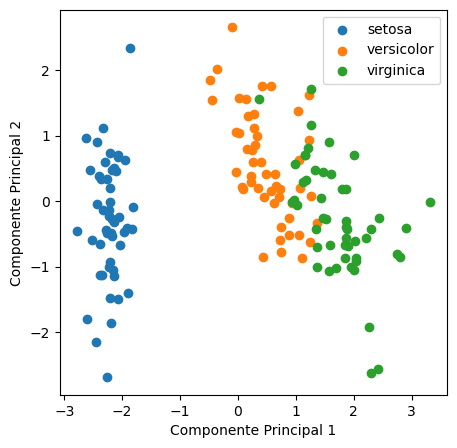

In [140]:
y = df['Species']
plt.figure(figsize=(5, 5))

for name in ('setosa', 'versicolor', 'virginica'):
    plt.scatter(data_proyectada[y==name,0], 
                -data_proyectada[y==name,1], 
                label=name)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.legend()
plt.show()

PLOT 3D

Varianza explicada por cada componente: [0.72962445 0.22850762 0.03668922]
Varianza total explicada: 99.48%


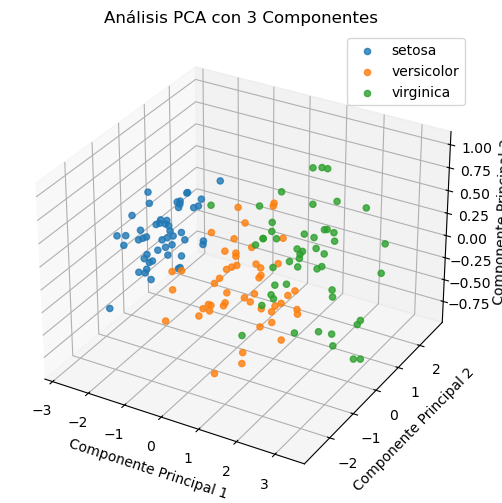

In [142]:
# Cargar datos
df = pd.read_csv(path)
X = df.iloc[:, :4]  # Filtrar las 4 columnas numéricas
y = df['Species']  # Extraer etiquetas

# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
data_proyectada = pca.fit_transform(X_std)

# Crear dataframe con los datos proyectados
df_proyectado = pd.DataFrame(data_proyectada, columns=['CP1', 'CP2', 'CP3'])
df_proyectado['Species'] = y

# Porcentaje de varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza total explicada: {np.sum(explained_variance) * 100:.2f}%")

# Gráfico 3D de los datos proyectados
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Dibujar scatterplot con las especies
for name in ('setosa', 'versicolor', 'virginica'):
    subset = df_proyectado[df_proyectado['Species'] == name]
    ax.scatter(subset['CP1'], subset['CP2'], subset['CP3'], label=name, alpha=0.8)

# Etiquetas y título
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
ax.set_title("Análisis PCA con 3 Componentes")
ax.legend()
plt.show()


# 2. PARTE 2: Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Redireccionar nuestra localización a donde està el archivo Brain Tumor
path2 = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"

In [145]:
df = pd.read_csv(path2)
df.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

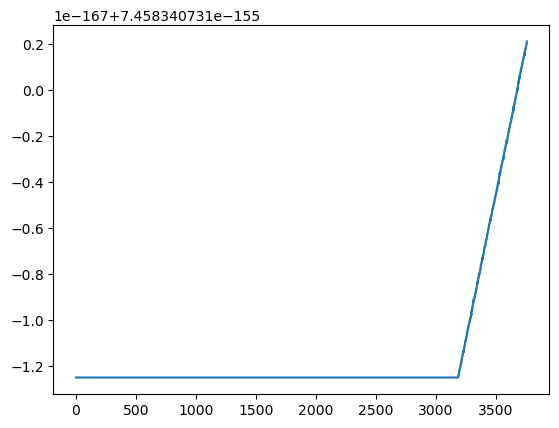

In [146]:
plt.plot(df["Coarseness"].values)

In [147]:
Z = df.iloc[:, 2:14]
Z

Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      6.535339   619.587845           24.891522  0.109059  4.276477   
1      8.749969   805.957634           28.389393  0.266538  3.718116   
2      7.341095  1143.808219           33.820234  0.001467  5.061750   
3      5.958145   959.711985           30.979219  0.001477  5.677977   
4      7.315231   729.540579           27.010009  0.146761  4.283221   
...         ...          ...                 ...       ...       ...   
3757  21.234512  1208.850174           34.768523  0.063774  2.082079   
3758  20.435349  1227.151440           35.030721  0.066763  2.144625   
3759  18.011520  1151.582765           33.934978  0.068396  2.308349   
3760  13.330429   945.732779           30.752769  0.087872  2.732822   
3761   6.110138   480.884025           21.929068  0.118171  4.110669   

       Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0     18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1     14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2     26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3     33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4     19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   
...         ...         ...       ...       ...          ...            ...   
3757   4.647310  158.437600  0.220666  0.048693     0.487131       5.211739   
3758   4.882034  161.158675  0.225931  0.051045     0.502712       5.083126   
3759   5.579498  167.130118  0.228930  0.052409     0.492269       5.103700   
3760   7.757570  223.812932  0.261527  0.068397     0.480064       6.439784   
3761  17.538826  239.251388  0.306224  0.093773     0.494333       6.787329   

      Correlation  
0        0.981939  
1        0.988834  
2        0.978014  
3        0.964189  
4        0.972789  
...           ...  
3757     0.950972  
3758     0.952749  
3759     0.952181  
3760     0.940898  
3761     0.938731  

[3762 rows x 12 columns]

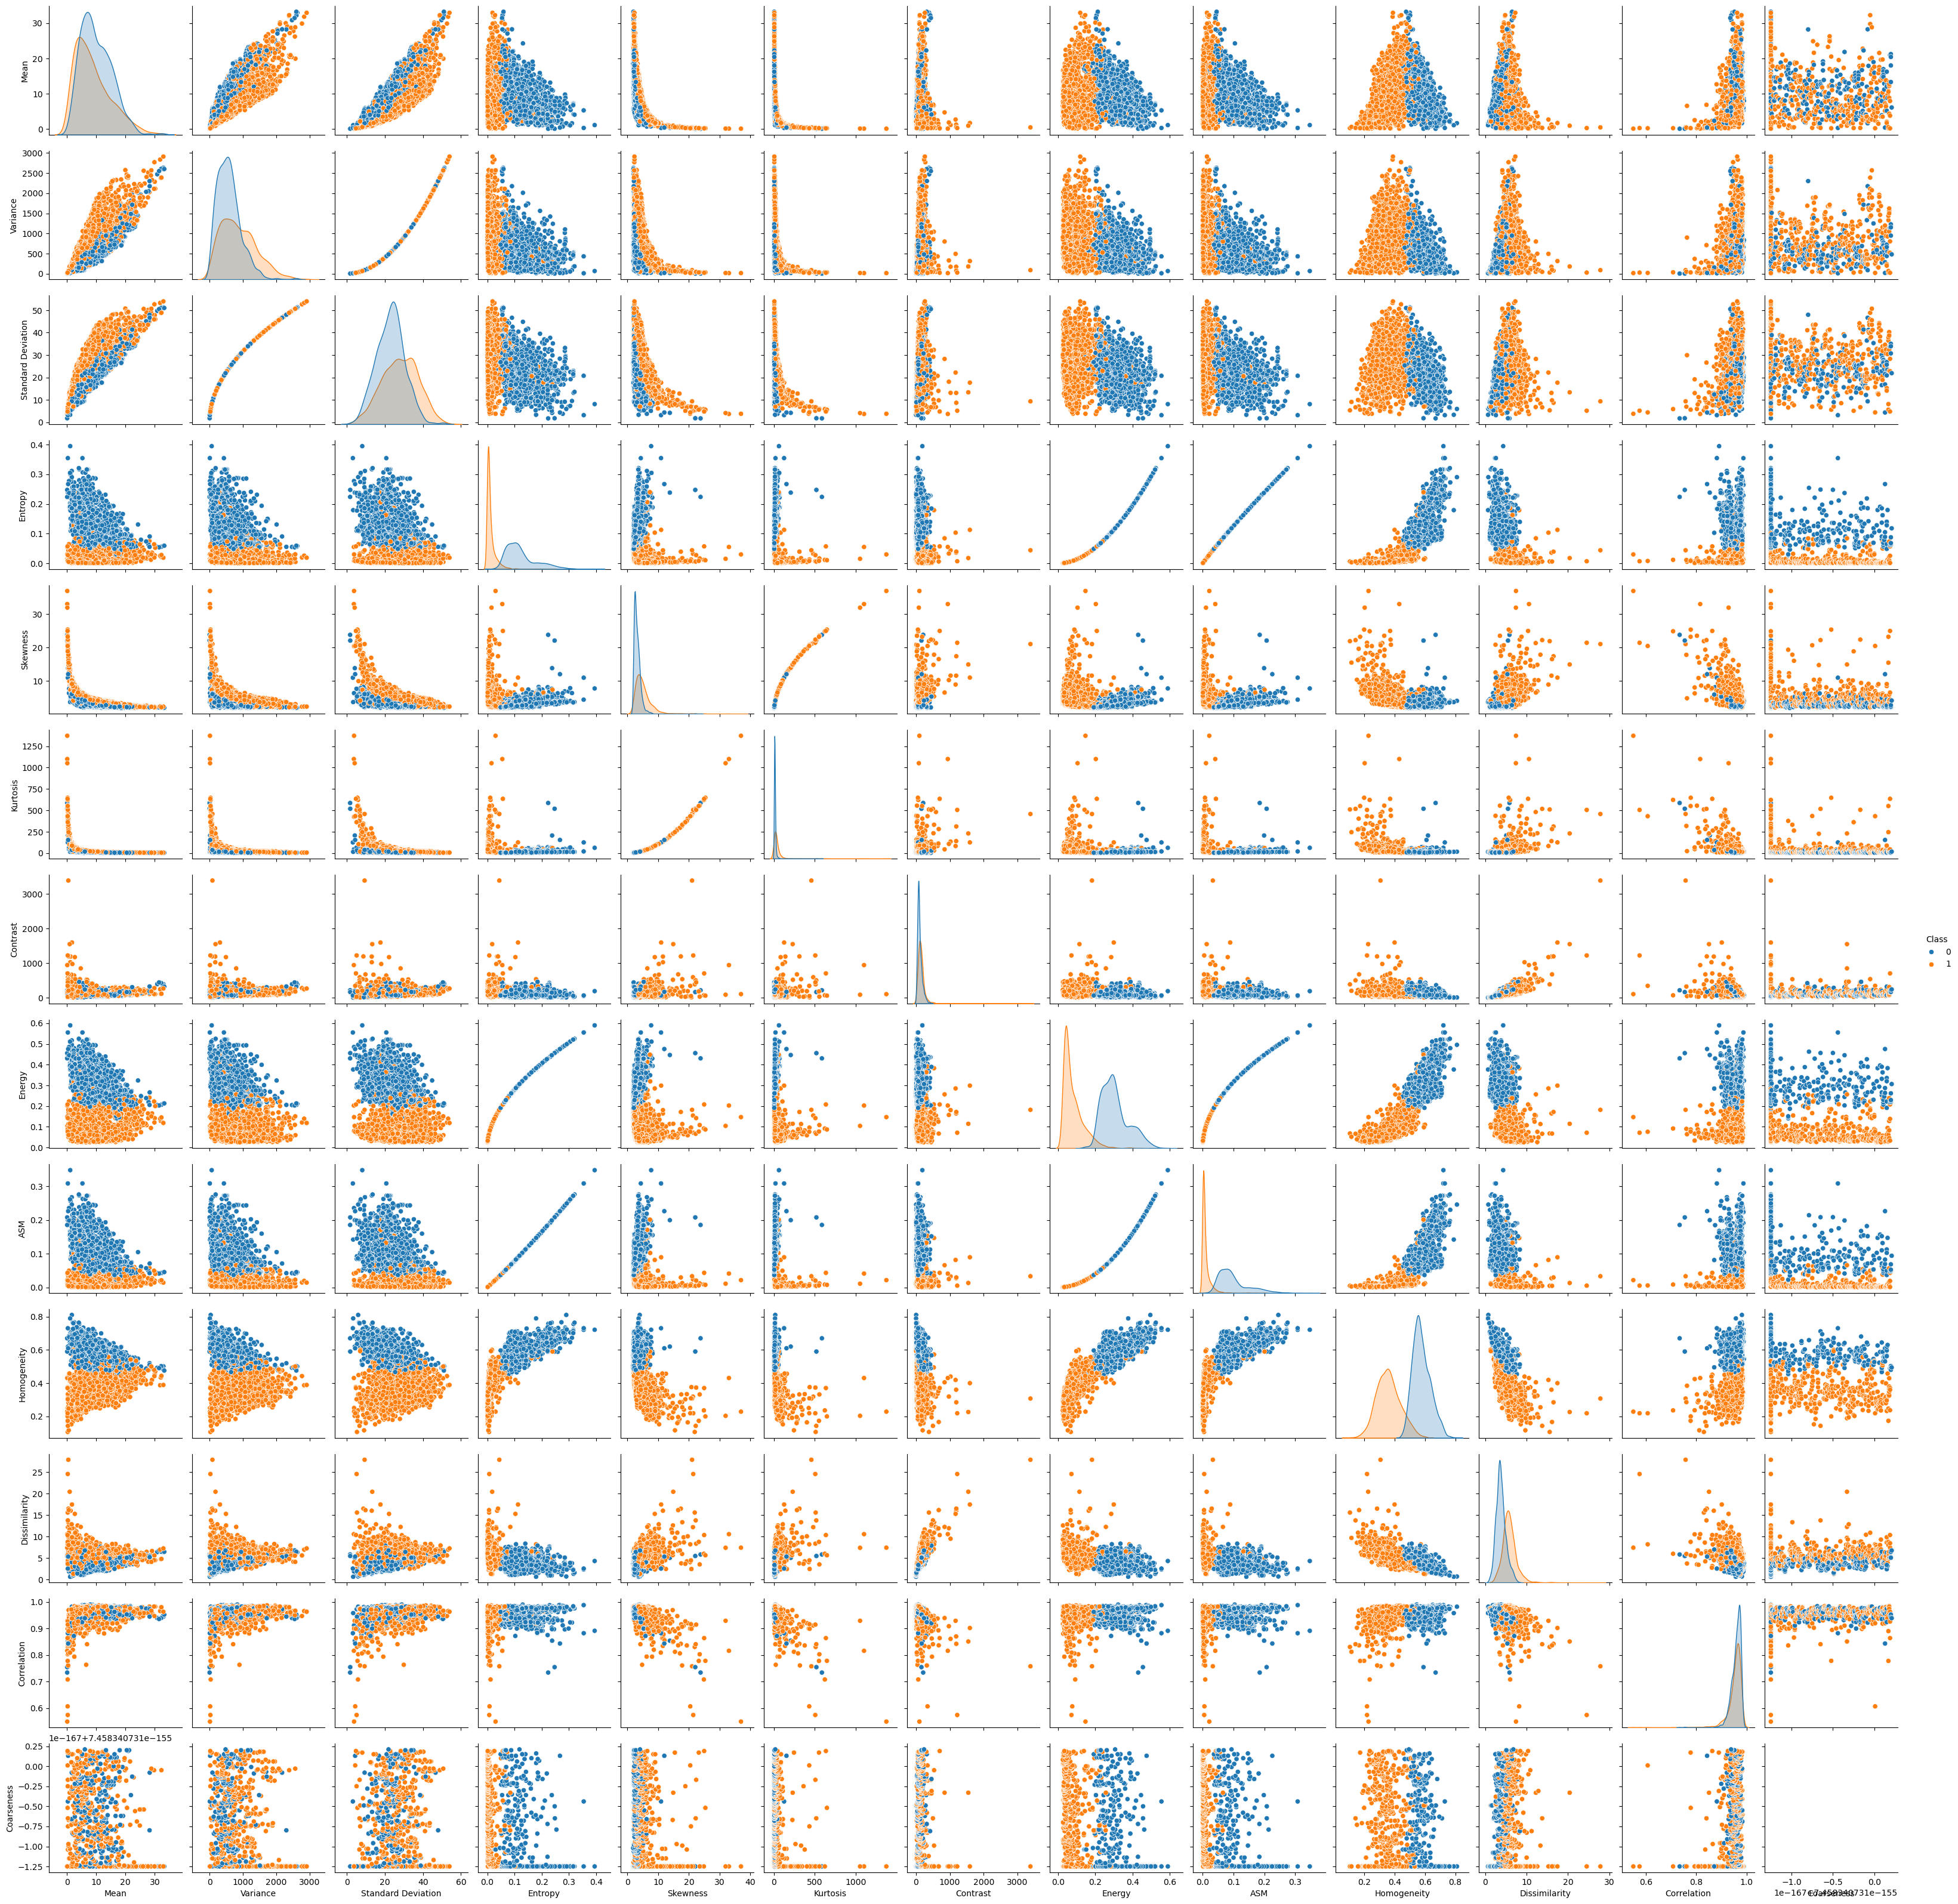

In [148]:
sns.pairplot(df, hue="Class")

In [149]:
Z_std = (Z - np.mean(Z, axis=0))/np.std(Z, axis=0)
Z_std

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0    -0.515700 -0.195790           -0.033144  0.504650  0.067855 -0.097267   
1    -0.129018  0.202943            0.365594  2.746050 -0.150204 -0.175881   
2    -0.375013  0.925765            0.984680 -1.026708  0.374531  0.037048   
3    -0.616481  0.531896            0.660820 -1.026561  0.615188  0.160202   
4    -0.379529  0.039451            0.208352  1.041256  0.070489 -0.094103   
...        ...       ...                 ...       ...       ...       ...   
3757  2.050827  1.064921            1.092779 -0.139892 -0.789131 -0.349862   
3758  1.911290  1.104076            1.122668 -0.097345 -0.764704 -0.345702   
3759  1.488082  0.942399            0.997760 -0.074100 -0.700765 -0.333342   
3760  0.670746  0.501988            0.635006  0.203090 -0.534994 -0.294742   
3761 -0.589942 -0.492543           -0.370847  0.634342  0.003102 -0.121400   

      Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0    -0.268050  0.685118  0.470073     0.404100      -0.121709     1.000713  
1    -0.585492  2.090287  2.865580     1.345457      -0.799181     1.264377  
2    -0.421010 -1.335981 -0.988340    -1.649391       0.693704     0.850636  
3     0.212525 -1.335154 -0.988223    -1.840334       1.622995     0.322041  
4     0.429532  1.075849  1.022442     0.171115       1.154744     0.650854  
...        ...       ...       ...          ...            ...          ...  
3757  0.278359  0.123407 -0.170487     0.061596       0.277439    -0.183335  
3758  0.303212  0.164116 -0.130150     0.183409       0.207915    -0.115377  
3759  0.357754  0.187301 -0.106751     0.101766       0.219037    -0.137095  
3760  0.875475  0.439344  0.167517     0.006346       0.941273    -0.568517  
3761  1.016485  0.784933  0.602848     0.117900       1.129143    -0.651387  

[3762 rows x 12 columns]

In [150]:
Z_mean = np.mean(Z_std, axis=0) 
Z_mean

Mean                  1.397665e-16
Variance             -1.133242e-16
Standard Deviation    2.795330e-16
Entropy              -1.964286e-16
Skewness              1.057693e-16
Kurtosis             -1.510989e-17
Contrast              7.177199e-17
Energy               -1.208791e-16
ASM                   1.510989e-17
Homogeneity          -4.230770e-16
Dissimilarity         1.510989e-16
Correlation           3.173078e-16
dtype: float64

In [151]:
np.mean(Z, axis=0), np.std(Z, axis=0) #Normalización

(Mean                    9.488890
 Variance              711.101063
 Standard Deviation     25.182271
 Entropy                 0.073603
 Skewness                4.102727
 Kurtosis               24.389071
 Contrast              127.961459
 Energy                  0.204705
 ASM                     0.058632
 Homogeneity             0.479252
 Dissimilarity           4.698498
 Correlation             0.955767
 dtype: float64,
 Mean                    5.727261
 Variance              467.404761
 Standard Deviation      8.772360
 Entropy                 0.070259
 Skewness                2.560599
 Kurtosis               56.427246
 Contrast              109.485046
 Energy                  0.129334
 ASM                     0.058293
 Homogeneity             0.127912
 Dissimilarity           1.849927
 Correlation             0.026153
 dtype: float64)

1.1 Determinar el porcentaje de aporte de cada vector propio

In [153]:
cov_matrix2 = (Z_std - Z_mean).T.dot((Z_std - Z_mean))/(Z_std.shape[0]-1) #primer metodo para sacar matriz cov
cov_matrix2

Mean  Variance  Standard Deviation   Entropy  \
Mean                1.000266  0.783235            0.791195 -0.099755   
Variance            0.783235  1.000266            0.975958 -0.344523   
Standard Deviation  0.791195  0.975958            1.000266 -0.345219   
Entropy            -0.099755 -0.344523           -0.345219  1.000266   
Skewness           -0.601753 -0.347491           -0.425541 -0.222281   
Kurtosis           -0.358259 -0.248378           -0.329886 -0.140162   
Contrast           -0.050987  0.135530            0.118013 -0.140807   
Energy             -0.014867 -0.335559           -0.331191  0.971519   
ASM                -0.109422 -0.341152           -0.342621  0.999478   
Homogeneity         0.095581 -0.290604           -0.288878  0.852246   
Dissimilarity      -0.113894  0.235550            0.224833 -0.502497   
Correlation         0.293771  0.288114            0.354255  0.122113   

                    Skewness  Kurtosis  Contrast    Energy       ASM  \
Mean               -0.601753 -0.358259 -0.050987 -0.014867 -0.109422   
Variance           -0.347491 -0.248378  0.135530 -0.335559 -0.341152   
Standard Deviation -0.425541 -0.329886  0.118013 -0.331191 -0.342621   
Entropy            -0.222281 -0.140162 -0.140807  0.971519  0.999478   
Skewness            1.000266  0.899953  0.349949 -0.295491 -0.209344   
Kurtosis            0.899953  1.000266  0.296743 -0.172500 -0.133776   
Contrast            0.349949  0.296743  1.000266 -0.130743 -0.139313   
Energy             -0.295491 -0.172500 -0.130743  1.000266  0.961884   
ASM                -0.209344 -0.133776 -0.139313  0.961884  1.000266   
Homogeneity        -0.470179 -0.307396 -0.270191  0.916232  0.837361   
Dissimilarity       0.512067  0.376039  0.761699 -0.545919 -0.491944   
Correlation        -0.571071 -0.589368 -0.427557  0.123713  0.121086   

                    Homogeneity  Dissimilarity  Correlation  
Mean                   0.095581      -0.113894     0.293771  
Variance              -0.290604       0.235550     0.288114  
Standard Deviation    -0.288878       0.224833     0.354255  
Entropy                0.852246      -0.502497     0.122113  
Skewness              -0.470179       0.512067    -0.571071  
Kurtosis              -0.307396       0.376039    -0.589368  
Contrast              -0.270191       0.761699    -0.427557  
Energy                 0.916232      -0.545919     0.123713  
ASM                    0.837361      -0.491944     0.121086  
Homogeneity            1.000266      -0.746874     0.198692  
Dissimilarity         -0.746874       1.000266    -0.393118  
Correlation            0.198692      -0.393118     1.000266

In [154]:
#Manera corta de calcularlos (la del rpofe)
eig_vals2, eig_vectors2 = np.linalg.eig(cov_matrix2)
print("Valores propios \n%s"%eig_vals2)
print("Vectores propios \n%s"%eig_vectors2)

Valores propios 
[4.90710566e+00 3.75689637e+00 1.54532242e+00 7.51981437e-01
 5.74289358e-01 2.40128855e-01 1.29225878e-01 4.01238990e-02
 3.06448213e-02 6.44871534e-05 1.07042171e-02 1.67032410e-02]
Vectores propios 
[[ 1.36943174e-03  4.29053945e-01  2.54168149e-01 -3.80815552e-01
   2.39604973e-01  2.66155771e-01 -5.89278264e-01  3.36859675e-01
  -9.60416311e-02 -5.54591452e-03  8.90601712e-02  1.13880660e-02]
 [-1.60192825e-01  4.20574153e-01  2.74990715e-01 -2.25068392e-01
  -1.62014901e-01 -2.14102548e-01  4.04552866e-01  6.15755860e-03
  -3.33629783e-01  6.81121505e-03 -4.46201243e-01  3.53467858e-01]
 [-1.49575575e-01  4.44042821e-01  2.46728233e-01 -1.28698555e-01
  -1.61386185e-01 -1.99132152e-01  2.50215051e-01 -2.05643795e-01
   3.07294499e-01 -7.55869290e-03  4.62750284e-01 -4.73068766e-01]
 [ 4.02581652e-01 -1.09882624e-01  2.78138676e-01 -4.32420047e-03
  -1.89074137e-01 -2.64303269e-01 -7.02753849e-02  1.55125392e-01
   1.50153800e-01 -7.52467419e-01  5.37319585e-02  1

In [155]:
eig_vals2, eig_vectors2 = np.linalg.eig(np.cov(Z_std.T))
print("Valores propios \n%s"%eig_vals2)
print("Vectores propios \n%s"%eig_vectors2)

Valores propios 
[4.90710566e+00 3.75689637e+00 1.54532242e+00 7.51981437e-01
 5.74289358e-01 2.40128855e-01 1.29225878e-01 4.01238990e-02
 3.06448213e-02 6.44871534e-05 1.07042171e-02 1.67032410e-02]
Vectores propios 
[[ 1.36943174e-03  4.29053945e-01  2.54168149e-01 -3.80815552e-01
   2.39604973e-01  2.66155771e-01 -5.89278264e-01  3.36859675e-01
  -9.60416311e-02 -5.54591452e-03  8.90601712e-02  1.13880660e-02]
 [-1.60192825e-01  4.20574153e-01  2.74990715e-01 -2.25068392e-01
  -1.62014901e-01 -2.14102548e-01  4.04552866e-01  6.15755860e-03
  -3.33629783e-01  6.81121505e-03 -4.46201243e-01  3.53467858e-01]
 [-1.49575575e-01  4.44042821e-01  2.46728233e-01 -1.28698555e-01
  -1.61386185e-01 -1.99132152e-01  2.50215051e-01 -2.05643795e-01
   3.07294499e-01 -7.55869290e-03  4.62750284e-01 -4.73068766e-01]
 [ 4.02581652e-01 -1.09882624e-01  2.78138676e-01 -4.32420047e-03
  -1.89074137e-01 -2.64303269e-01 -7.02753849e-02  1.55125392e-01
   1.50153800e-01 -7.52467419e-01  5.37319585e-02  1

In [156]:
#Manera rápida del profe para sacar el % de cada vector
eigen_pairs2 = [(np.abs(eig_vals2[i]), eig_vectors2[:,i]) for i in range(len(eig_vals2))]
eigen_pairs2

[(4.907105661896034,
  array([ 0.00136943, -0.16019282, -0.14957557,  0.40258165, -0.226439  ,
         -0.18265944, -0.20348598,  0.41184785,  0.39858351,  0.42547398,
         -0.36155618,  0.15364722])),
 (3.756896366158593,
  array([ 0.42905395,  0.42057415,  0.44404282, -0.10988262, -0.40062892,
         -0.35364128, -0.11528353, -0.08462646, -0.11242046, -0.00631365,
         -0.08739418,  0.32163379])),
 (1.5453224195990445,
  array([ 0.25416815,  0.27499071,  0.24672823,  0.27813868,  0.05099936,
          0.14853806,  0.59105637,  0.28354991,  0.27854662,  0.13711388,
          0.33681352, -0.23937056])),
 (0.7519814366221103,
  array([-0.38081555, -0.22506839, -0.12869856, -0.0043242 , -0.26350687,
         -0.59810815,  0.42639154, -0.02236709, -0.00318504, -0.08415574,
          0.34374611,  0.23023626])),
 (0.5742893584170534,
  array([ 0.23960497, -0.1620149 , -0.16138618, -0.18907414, -0.35023323,
         -0.24253505,  0.08271604, -0.04847421, -0.21087038,  0.19304611,


In [157]:
# Ordenamos de mayor a menor
eigen_pairs2.sort(reverse=True)

# Calculamos los porcentajes
total_sum2 = sum(eig_vals2)
var_exp2 = [(i/total_sum2)*100 for i in sorted(eig_vals2, reverse=True)]
cum_var_exp2 = np.cumsum(var_exp2)

In [158]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp2

El porcentaje de información que cada valor propio aporta es:


[40.88167728688414,
 31.29914768988673,
 12.87426373407763,
 6.264846232358135,
 4.784472525710033,
 2.0005418709701526,
 1.0765960635875247,
 0.3342769453505075,
 0.25530562880843366,
 0.13915667474024587,
 0.08917809752888994,
 0.000537250097589765]

Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

In [160]:
T_matrix2 = np.stack((eigen_pairs2[0][1], eigen_pairs2[1][1], eigen_pairs2[2][1], eigen_pairs2[3][1]), axis=1)
T_matrix2

array([[ 0.00136943,  0.42905395,  0.25416815, -0.38081555],
       [-0.16019282,  0.42057415,  0.27499071, -0.22506839],
       [-0.14957557,  0.44404282,  0.24672823, -0.12869856],
       [ 0.40258165, -0.10988262,  0.27813868, -0.0043242 ],
       [-0.226439  , -0.40062892,  0.05099936, -0.26350687],
       [-0.18265944, -0.35364128,  0.14853806, -0.59810815],
       [-0.20348598, -0.11528353,  0.59105637,  0.42639154],
       [ 0.41184785, -0.08462646,  0.28354991, -0.02236709],
       [ 0.39858351, -0.11242046,  0.27854662, -0.00318504],
       [ 0.42547398, -0.00631365,  0.13711388, -0.08415574],
       [-0.36155618, -0.08739418,  0.33681352,  0.34374611],
       [ 0.15364722,  0.32163379, -0.23937056,  0.23023626]])

In [161]:
T_matrix2.shape

(12, 4)

In [162]:
#Primer método para proyectar
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_proyectada2 = pca.fit_transform(Z_std)
print(data_proyectada2)

[[-1.13494746  0.11653928 -0.12207389 -0.30627248]
 [-4.26214321 -0.04943709  1.50070581  0.31306196]
 [ 2.48138326 -1.11144579 -0.95783349 -0.11793916]
 ...
 [ 0.20359808 -1.77566408  1.13305801  0.33898934]
 [ 0.27314507 -0.65503372  1.59330341 -0.42131414]
 [-0.30895902  1.21326935  1.32536124 -1.09447973]]


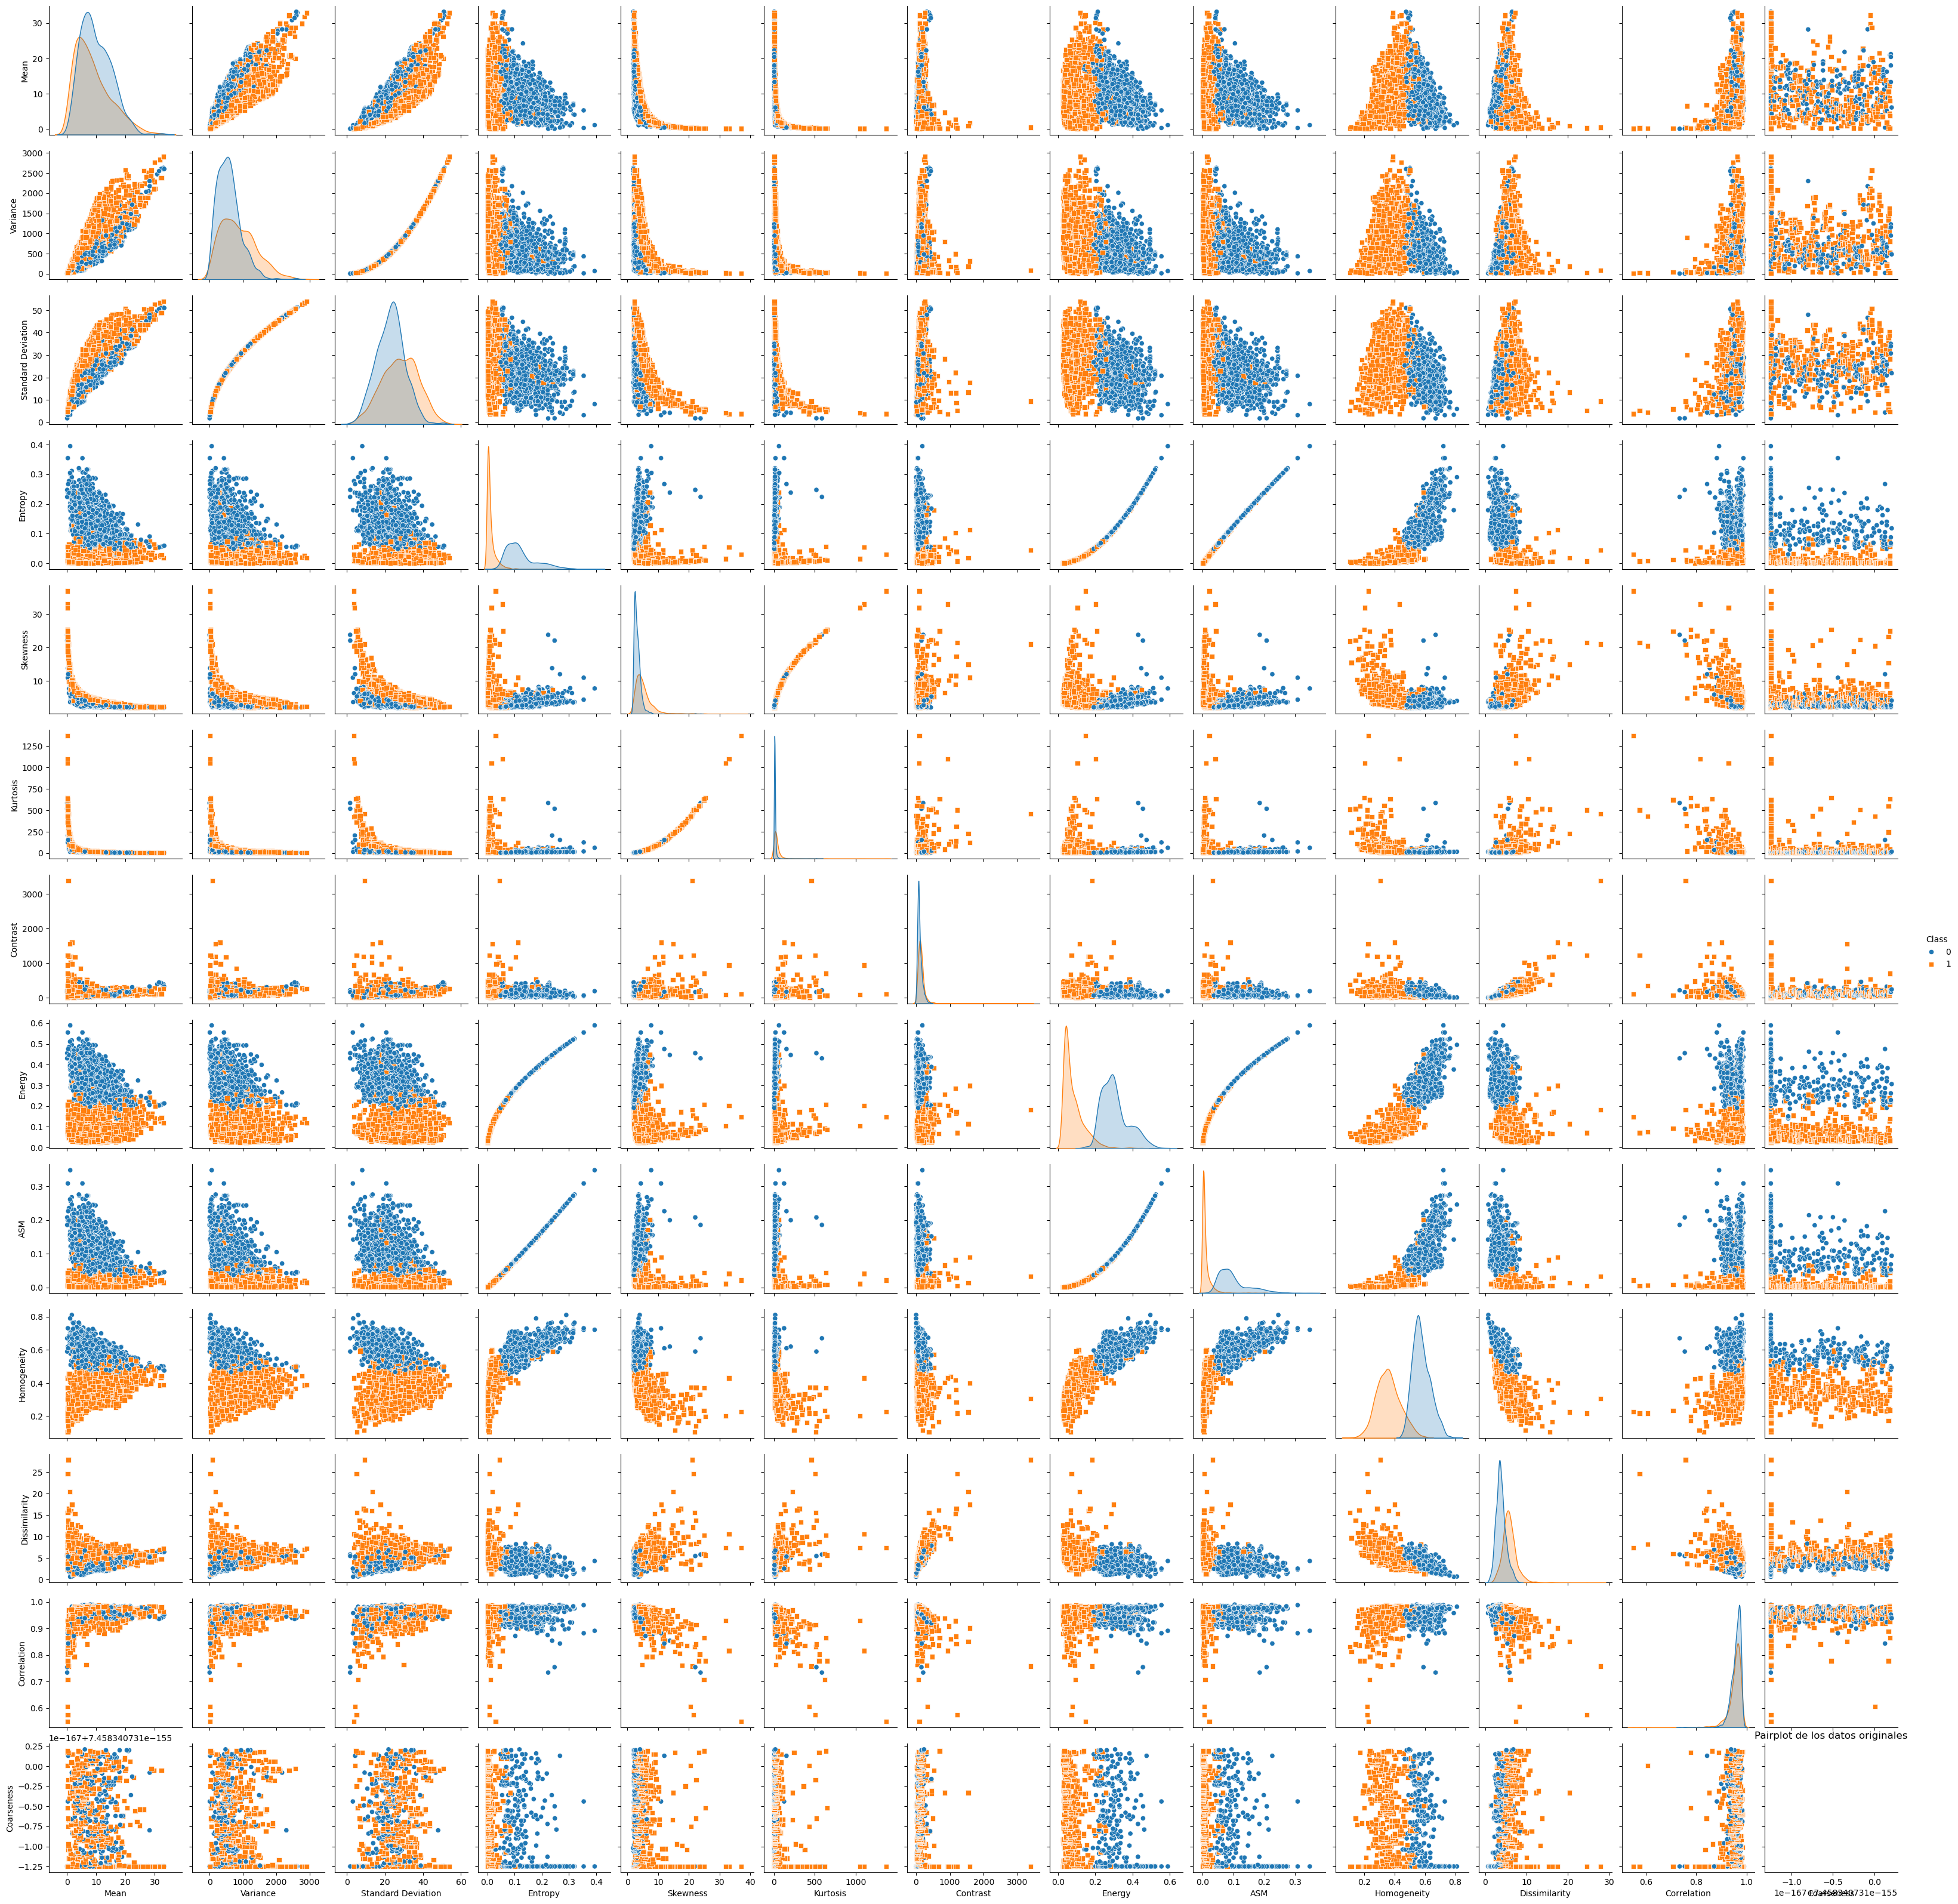

In [163]:
# El mentado pairplot de los datos originales
sns.pairplot(df, hue='Class', markers=["o", "s"])
plt.title("Pairplot de los datos originales")
plt.show()

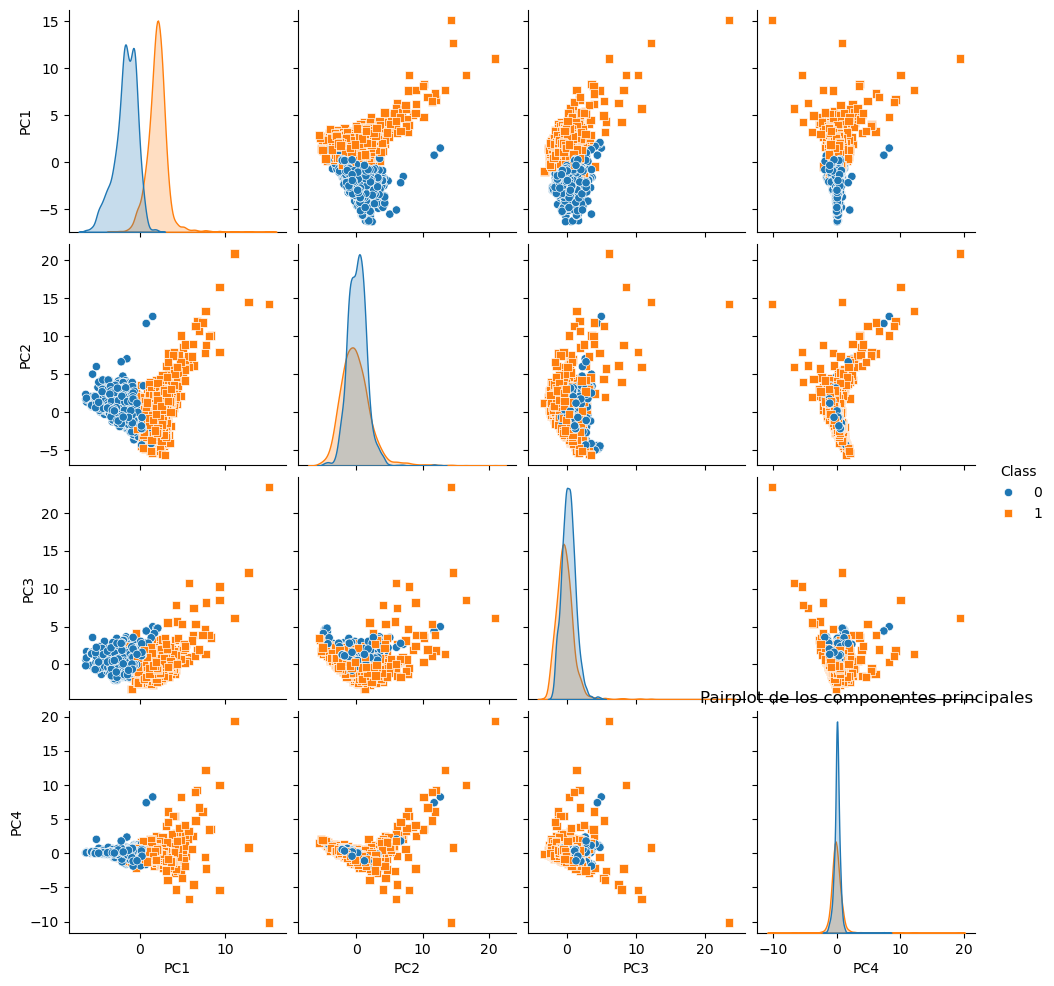

In [164]:
data_proyectada2df = pd.DataFrame(data_proyectada2, columns=['PC1', 'PC2', 'PC3', 'PC4'])
data_proyectada2df['Class'] = df['Class'] #Aqui lo que hice fue agregar a mi df proyectado mi columna class para pintarlos según
#tuvieran tumor o no (0 y 1).
sns.pairplot(data_proyectada2df, hue='Class', markers=["o", "s"])
plt.title("Pairplot de los componentes principales")
plt.show()